In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
y = df.iloc[0:100, 4].values

In [7]:
y = np.where( y == 'Iris-setosa', -1, 1)

In [8]:
X = df.iloc[0:100, [0, 2]].values

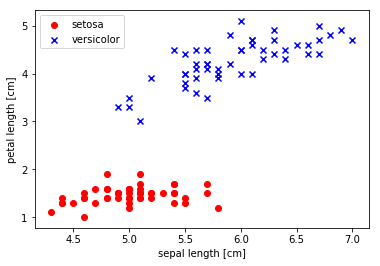

In [9]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')

plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')

plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')

plt.show()

In [10]:
from perceptron import Perceptron

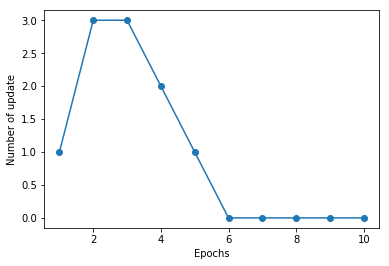

In [11]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of update')
plt.show()

In [12]:
from plot_decision_regions import plot_decision_regions

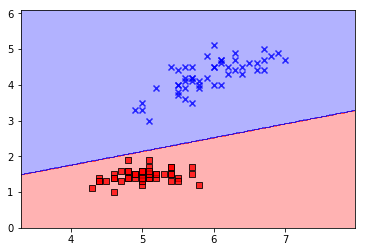

In [13]:
plot_decision_regions(X, y, classifier=ppn)

In [14]:
from adaline_gd import AdalineGD

In [18]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ada2 = AdalineGD(n_iter=10, eta=0.001).fit(X, y)
ada3 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

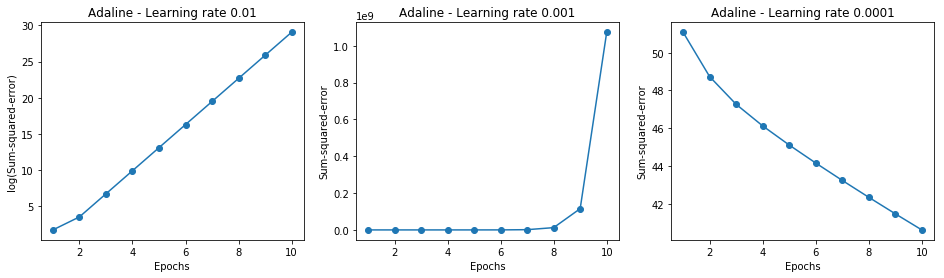

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')
ax[1].plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.001')
ax[2].plot(range(1, len(ada3.cost_)+1), ada3.cost_, marker='o')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline - Learning rate 0.0001')
plt.show()